In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df= pd.read_csv('dailyActivity_merged.csv')
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [4]:
# no. of unique ID
len(df.Id.unique())

33

In [5]:
df['ActivityDate']=pd.to_datetime(df['ActivityDate'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [7]:
df.isna().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [8]:
#r create new list of rearranged columns
new_cols = ['Id', 'ActivityDate', 'DayOfTheWeek', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories']

# reindex function to rearrange columns based on "new_cols"
df = df.reindex(columns=new_cols)

# print 1st 5 rows to confirm
df.head(5)

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [9]:
# adding a new column called Dayoftheweek 
import datetime as dt
df['DayOfTheWeek']=df['ActivityDate'].dt.day_name()
df.head()

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [10]:
df.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [11]:
df['total_min']=df.VeryActiveMinutes+df.FairlyActiveMinutes+df.LightlyActiveMinutes+df.SedentaryMinutes

In [12]:
df.head(1)

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,total_min
0,1503960366,2016-04-12,Tuesday,13162,8.5,8.5,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1094


In [13]:
df['total_hours']=round(df["total_min"]/60)

In [14]:
df.head()

,Id,ActivityDate,DayOfTheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,total_min,total_hours
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,1094,18.0
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,1033,17.0
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,1440,24.0
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,998,17.0
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,1040,17.0


### visualization

In [17]:
distance=['VeryActiveDistance','ModeratelyActiveDistance','LightActiveDistance','SedentaryActiveDistance']
all_min=['VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']

In [18]:
distance_df=df[distance]
distance_df.head()

,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance
0,1.88,0.55,6.06,0.0
1,1.57,0.69,4.71,0.0
2,2.44,0.40,3.91,0.0
3,2.14,1.26,2.83,0.0
4,2.71,0.41,5.04,0.0


In [19]:
min_df=df[all_min]
min_df.head()

,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes
0,25,13,328,728
1,21,19,217,776
2,30,11,181,1218
3,29,34,209,726
4,36,10,221,773


In [20]:
min_df=pd.DataFrame(min_df, columns=all_min)
distance_df=pd.DataFrame(distance_df,columns=distance)

In [31]:
# calculating total of individual minutes column
very_active_mins = df["VeryActiveMinutes"].sum()
fairly_active_mins = df["FairlyActiveMinutes"].sum()
lightly_active_mins = df["LightlyActiveMinutes"].sum()
sedentary_mins = df["SedentaryMinutes"].sum()

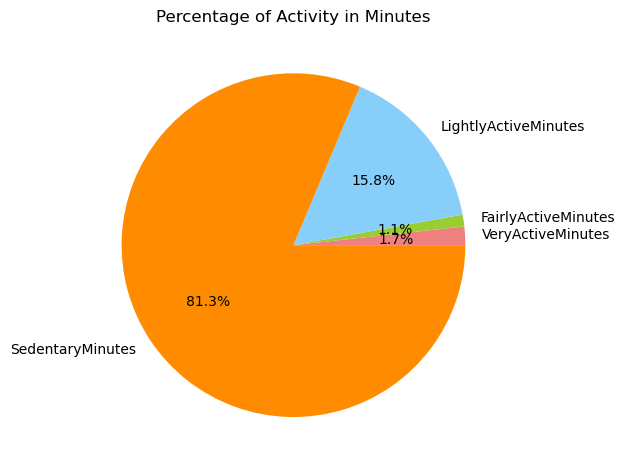

In [36]:
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
colours = ["lightcoral", "yellowgreen", "lightskyblue", "darkorange"]

plt.pie(slices,labels=all_min,colors=colours ,autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

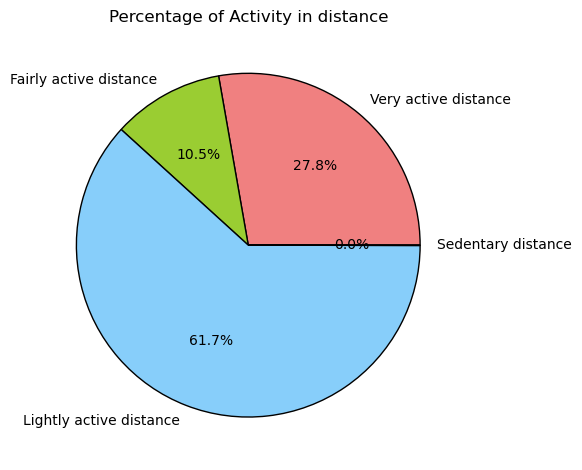

In [37]:
# Calculate the total distance covered in four activity categories
very_active_dist = df["VeryActiveDistance"].sum()
fairly_active_dist = df["ModeratelyActiveDistance"].sum()
lightly_active_dist = df["LightActiveDistance"].sum()
sedentary_dist = df["SedentaryActiveDistance"].sum()

# Define the data for the pie chart
slices = [very_active_dist, fairly_active_dist, lightly_active_dist, sedentary_dist]
labels = ["Very active distance", "Fairly active distance", "Lightly active distance", "Sedentary distance"]
colours = ["lightcoral", "yellowgreen", "lightskyblue", "darkorange"]

# Create the pie chart
plt.pie(slices, labels=labels, colors=colours, wedgeprops={"edgecolor": "black"}, autopct="%1.1f%%")

# Set the title of the pie chart
plt.title("Percentage of Activity in distance")

# Adjust the layout of the plot to avoid overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

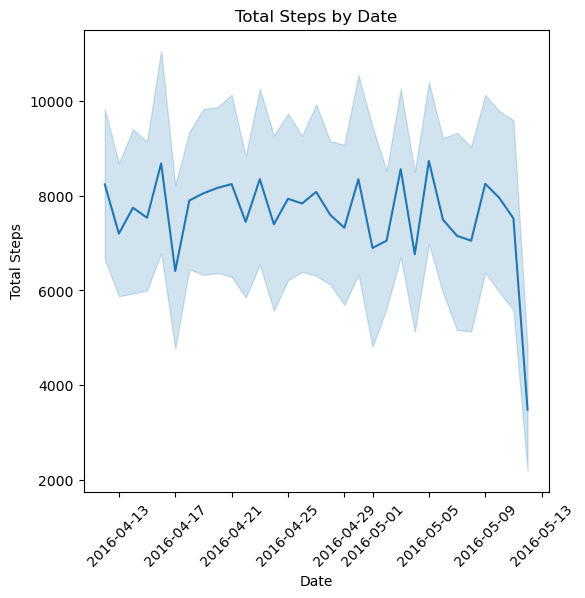

In [22]:
plt.figure(figsize=(6, 6)) # increase the figure size
sns.lineplot(x="ActivityDate", y="TotalSteps", data=df)
plt.xlabel("Date") # customize the x-axis label
plt.ylabel("Total Steps") # customize the y-axis label
plt.xticks(rotation=45) # rotate the x-axis tick labels
plt.title("Total Steps by Date") # add a title
plt.show()

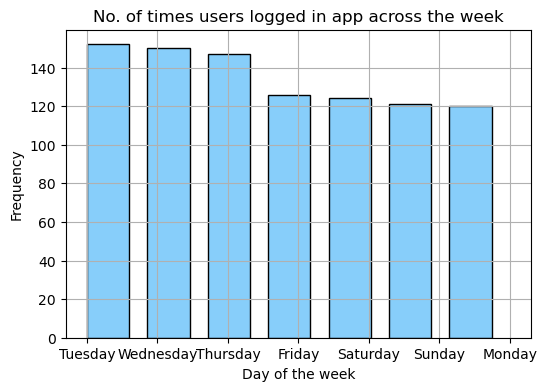

In [24]:
plt.figure(figsize=(6,4)) # specify size of the chart
plt.hist(df.DayOfTheWeek, bins = 7, width = 0.6, color = "lightskyblue", edgecolor = "black")

# adding annotations and visuals
plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the week")
plt.grid(True)
plt.show()

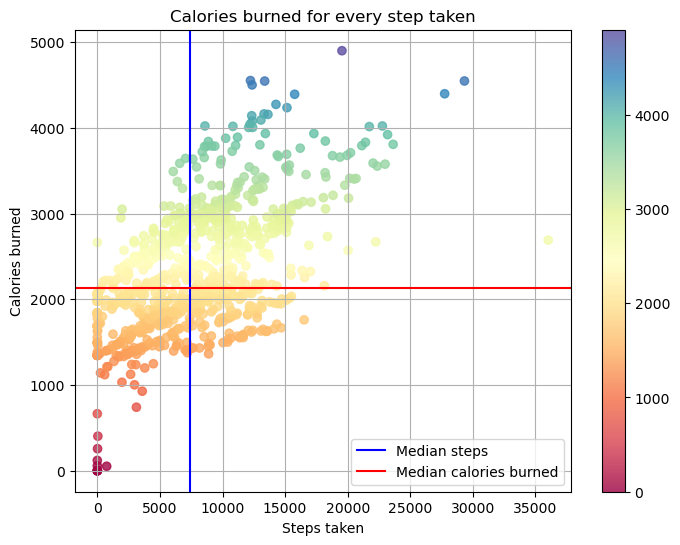

In [29]:
plt.figure(figsize=(8,6)) # specify size of the chart
plt.scatter(df.TotalSteps, df.Calories, 
            alpha = 0.8, c = df.Calories, 
            cmap = "Spectral")
# add annotations and visuals
median_calories = df.Calories.median()
median_steps = df.TotalSteps.median()

plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "Blue", label = "Median steps")
plt.axhline(median_calories, color = "Red", label = "Median calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for every step taken")
plt.grid(True)
plt.legend()
plt.show()